<a href="https://colab.research.google.com/github/Sree-git4/Personal-Project-Sree/blob/main/5_countries_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import os
from google.colab import files

def download_and_process_data(url):
  filename = os.path.basename(url)
  response = requests.get(url)

  with open(filename, 'wb') as file:
      file.write(response.content)

  df = pd.read_csv(filename)

  return df


protest_df = download_and_process_data("https://raw.githubusercontent.com/IkerZha0401/QM2_Final_PJ/refs/heads/main/ProtestV1.csv")
protest_df

,event_id_cnty,event_date,year,country,latitude,longitude
0,IRN6075,31 January 2020,2020,Iran,32.6525,51.6746
1,ALG8120,31 January 2020,2020,Algeria,36.7500,5.0833
2,ALG8123,31 January 2020,2020,Algeria,36.3800,3.9014
3,ALG8124,31 January 2020,2020,Algeria,36.7664,3.4772
4,ALG8126,31 January 2020,2020,Algeria,36.3650,6.6147
...,...,...,...,...,...,...
52680,ALG1318,25 January 2005,2005,Algeria,35.3758,1.3131
52681,ALG1316,25 January 2005,2005,Algeria,34.8472,-1.7286
52682,ALG1317,25 January 2005,2005,Algeria,36.4703,1.4531
52683,ALG1314,25 January 2005,2005,Algeria,36.0750,4.7750


In [ ]:
# List of countries to filter by
countries_of_interest = ['Algeria', 'Bahrain', 'Jordan', 'Libya', 'Syria', 'Tunisia']

# Filter the DataFrame for the selected countries
filtered_df = protest_df[protest_df['country'].isin(countries_of_interest)]

# Display the filtered DataFrame
filtered_df.head()


,event_id_cnty,event_date,year,country,latitude,longitude
1,ALG8120,31 January 2020,2020,Algeria,36.7500,5.0833
2,ALG8123,31 January 2020,2020,Algeria,36.3800,3.9014
3,ALG8124,31 January 2020,2020,Algeria,36.7664,3.4772
4,ALG8126,31 January 2020,2020,Algeria,36.3650,6.6147
5,TUN6106,31 January 2020,2020,Tunisia,36.2941,8.7666


In [ ]:
# Group the filtered DataFrame by 'country' and 'year', and count the number of protests
protests_by_year_country = filtered_df.groupby(['country', 'year']).size().reset_index(name='protest_count')

# Display the result
protests_by_year_country.head()




,country,year,protest_count
0,Algeria,2005,6
1,Algeria,2006,7
2,Algeria,2007,2
3,Algeria,2008,9
4,Algeria,2009,12


In [ ]:
# Save the grouped data to a CSV file
protests_by_year_country.to_csv('protests_by_year_country.csv', index=False)

# Provide a link to download the file
files.download('protests_by_year_country.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload your file
uploaded = files.upload()

# Step 2: Load the GDP per capita data into a DataFrame
gdp_df = pd.read_csv('Arab Countries GDP Per Capita in USD.csv')  # Replace with your file name if different

# Check the first few rows to ensure data is loaded correctly
gdp_df.head()

# Step 3: Reshape the GDP data (if it's in wide format)
gdp_long_df = gdp_df.melt(id_vars=['Year'], var_name='Country', value_name='GDP')

# Step 4: Save the reshaped data to a CSV file
gdp_long_df.to_csv('reshaped_gdp_data.csv', index=False)

# Provide a download link for the reshaped file
files.download('reshaped_gdp_data.csv')


Saving Arab Countries GDP Per Capita in USD.csv to Arab Countries GDP Per Capita in USD.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Convert column names to lowercase for both DataFrames
protests_by_year_country.columns = protests_by_year_country.columns.str.lower()
gdp_long_df.columns = gdp_long_df.columns.str.lower()

# Merge the DataFrames on 'year' and 'country' after normalizing column names
merged_df = pd.merge(protests_by_year_country, gdp_long_df, on=['year', 'country'], how='left')

# Check the merged data
merged_df.head()



,country,year,protest_count,gdp
0,Algeria,2005,6,14.89
1,Algeria,2006,7,13.34
2,Algeria,2007,2,13.89
3,Algeria,2008,9,24.46
4,Algeria,2009,12,-18.15


In [ ]:
# Drop rows with missing values for a cleaner analysis
merged_df_clean = merged_df.dropna(subset=['gdp', 'protest_count'])

# Compute Pearson correlation coefficient between GDP and number of protests
correlation = merged_df_clean['gdp'].corr(merged_df_clean['protest_count'])

print("Pearson Correlation Coefficient between GDP and Protests: ", correlation)


Pearson Correlation Coefficient between GDP and Protests:  -0.050096579269605236


In [ ]:
from scipy.stats import spearmanr

spearman_corr, _ = spearmanr(merged_df['gdp'], merged_df['protest_count'])
print(f"Spearman Rank Correlation: {spearman_corr}")


Spearman Rank Correlation: -0.19754782584368585


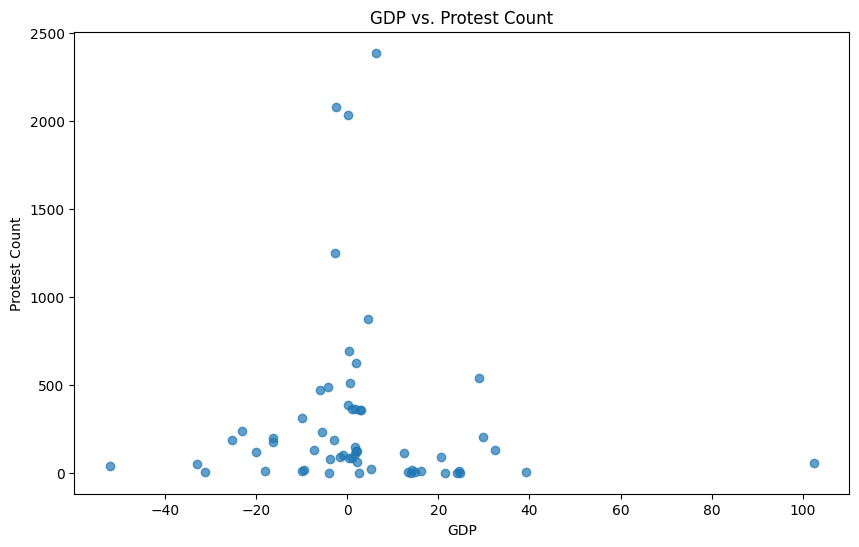

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['gdp'], merged_df['protest_count'], alpha=0.7)
plt.title('GDP vs. Protest Count')
plt.xlabel('GDP')
plt.ylabel('Protest Count')
plt.show()


In [ ]:
correlation_matrix = merged_df[['gdp', 'protest_count']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                     gdp  protest_count
gdp            1.000000      -0.050097
protest_count -0.050097       1.000000


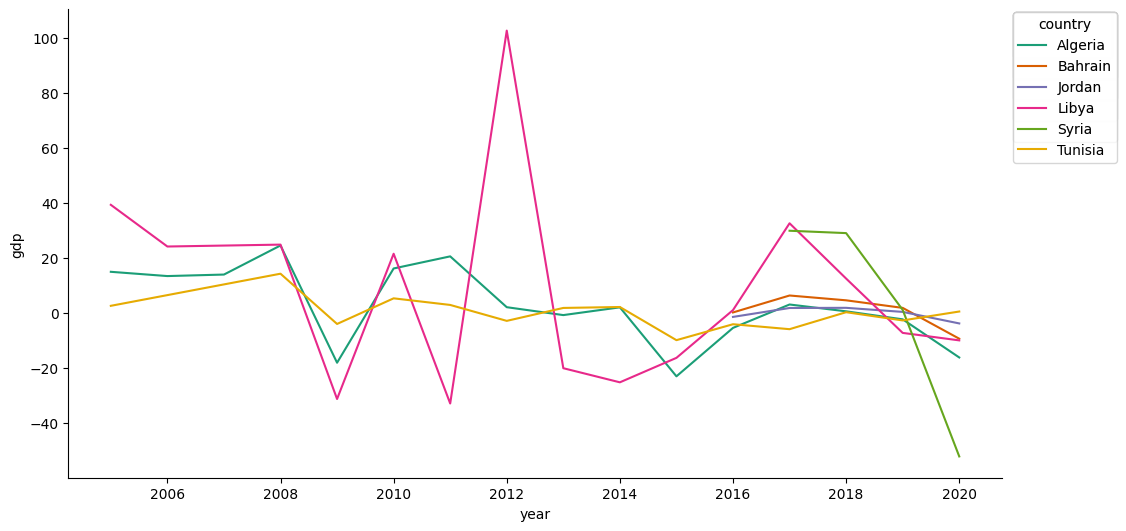

In [ ]:
# @title year vs gdp

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['gdp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('gdp')

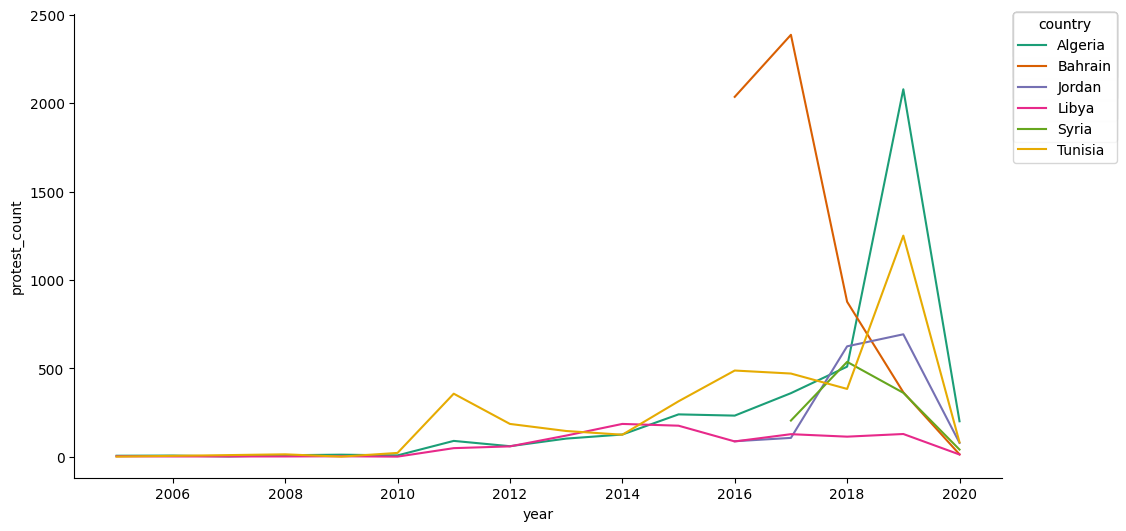

In [ ]:
# @title year vs protest_count

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['protest_count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('protest_count')

In [ ]:
import scipy.stats as stats
import numpy as np

# Step 1: Extract the data (assumes columns are named 'gdp' and 'protest_count')
gdp = merged_df['gdp']
protest_count = merged_df['protest_count']

# Step 2: Calculate the Pearson correlation coefficient
r, p_value = stats.pearsonr(gdp, protest_count)

# Step 3: Perform the t-test
n = len(merged_df)  # Number of data points
t_stat = r * np.sqrt((n - 2) / (1 - r**2))  # t-statistic
df = n - 2  # Degrees of freedom

# Critical t-value at 10% confidence level (two-tailed)
t_critical = stats.t.ppf(1 - 0.05, df)

# Step 4: Output results
print("Pearson Correlation Coefficient (r):", r)
print("p-value:", p_value)
print("t-statistic:", t_stat)
print("Critical t-value:", t_critical)

# Step 5: Conclusion
if abs(t_stat) > t_critical:
    print("Reject the null hypothesis (H0): Significant correlation exists.")
else:
    print("Fail to reject the null hypothesis (H0): No significant correlation.")


Pearson Correlation Coefficient (r): -0.050096579269605215
p-value: 0.7063202582735476
t-statistic: -0.3786963787332731
Critical t-value: 1.6720288884609527
Fail to reject the null hypothesis (H0): No significant correlation.


In [ ]:
# Step 1: Import pandas (if not already imported)
import pandas as pd

# Step 2: Display summary statistics for merged_df
summary_statistics = merged_df.describe()

# Step 3: Output the summary statistics
print("Summary Statistics for merged_df:")
print(summary_statistics)


Summary Statistics for merged_df:
              year  protest_count         gdp
count    59.000000      59.000000   59.000000
mean   2014.135593     294.508475    2.847627
std       4.606808     500.129755   21.208663
min    2005.000000       1.000000  -52.200000
25%    2010.500000      14.000000   -4.825000
50%    2015.000000     120.000000    1.050000
75%    2018.000000     358.500000   12.885000
max    2020.000000    2387.000000  102.530000


In [ ]:
# Step 1: Calculate IQR
Q1 = merged_df[['gdp', 'protest_count']].quantile(0.25)
Q3 = merged_df[['gdp', 'protest_count']].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define non-outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out rows with outliers
filtered_df = merged_df[
    (merged_df['gdp'] >= lower_bound['gdp']) &
    (merged_df['gdp'] <= upper_bound['gdp']) &
    (merged_df['protest_count'] >= lower_bound['protest_count']) &
    (merged_df['protest_count'] <= upper_bound['protest_count'])
]

# Step 4: Output the cleaned dataset
print("Dataset after removing outliers:")
print(filtered_df)


Dataset after removing outliers:
    country  year  protest_count    gdp
0   Algeria  2005              6  14.89
1   Algeria  2006              7  13.34
2   Algeria  2007              2  13.89
3   Algeria  2008              9  24.46
4   Algeria  2009             12 -18.15
5   Algeria  2010              8  16.10
6   Algeria  2011             90  20.50
7   Algeria  2012             60   2.03
8   Algeria  2013            103  -0.84
9   Algeria  2014            126   1.98
10  Algeria  2015            240 -23.09
11  Algeria  2016            233  -5.49
12  Algeria  2017            360   3.01
13  Algeria  2018            510   0.53
15  Algeria  2020            201 -16.24
19  Bahrain  2019            365   1.78
20  Bahrain  2020             14  -9.42
21   Jordan  2016             88  -1.50
22   Jordan  2017            107   1.74
23   Jordan  2018            625   1.80
24   Jordan  2019            693   0.32
25   Jordan  2020             79  -3.87
26    Libya  2005              3  39.23
27    L

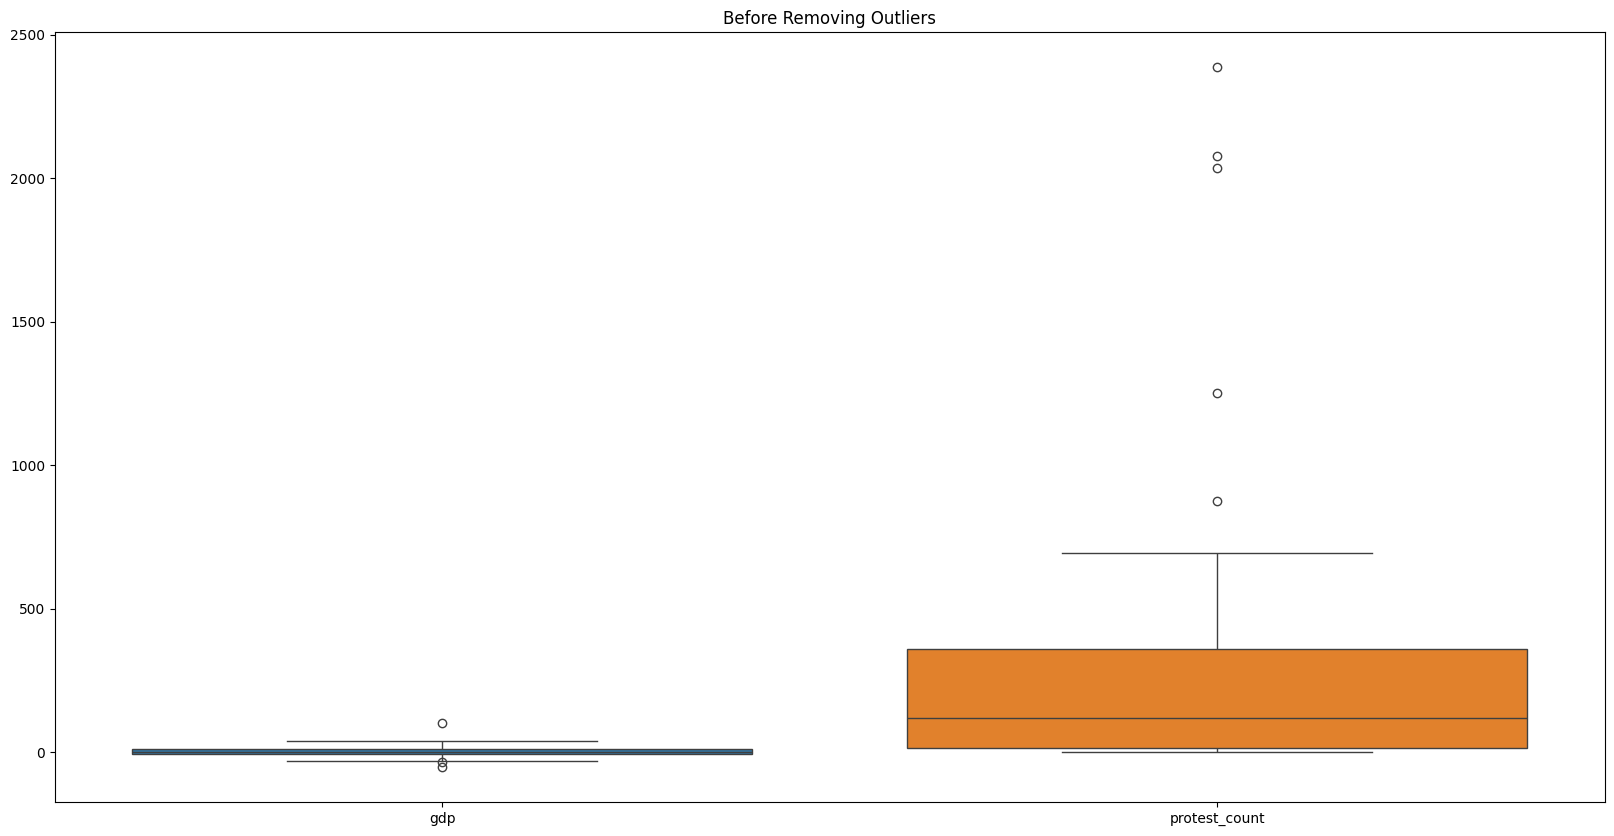

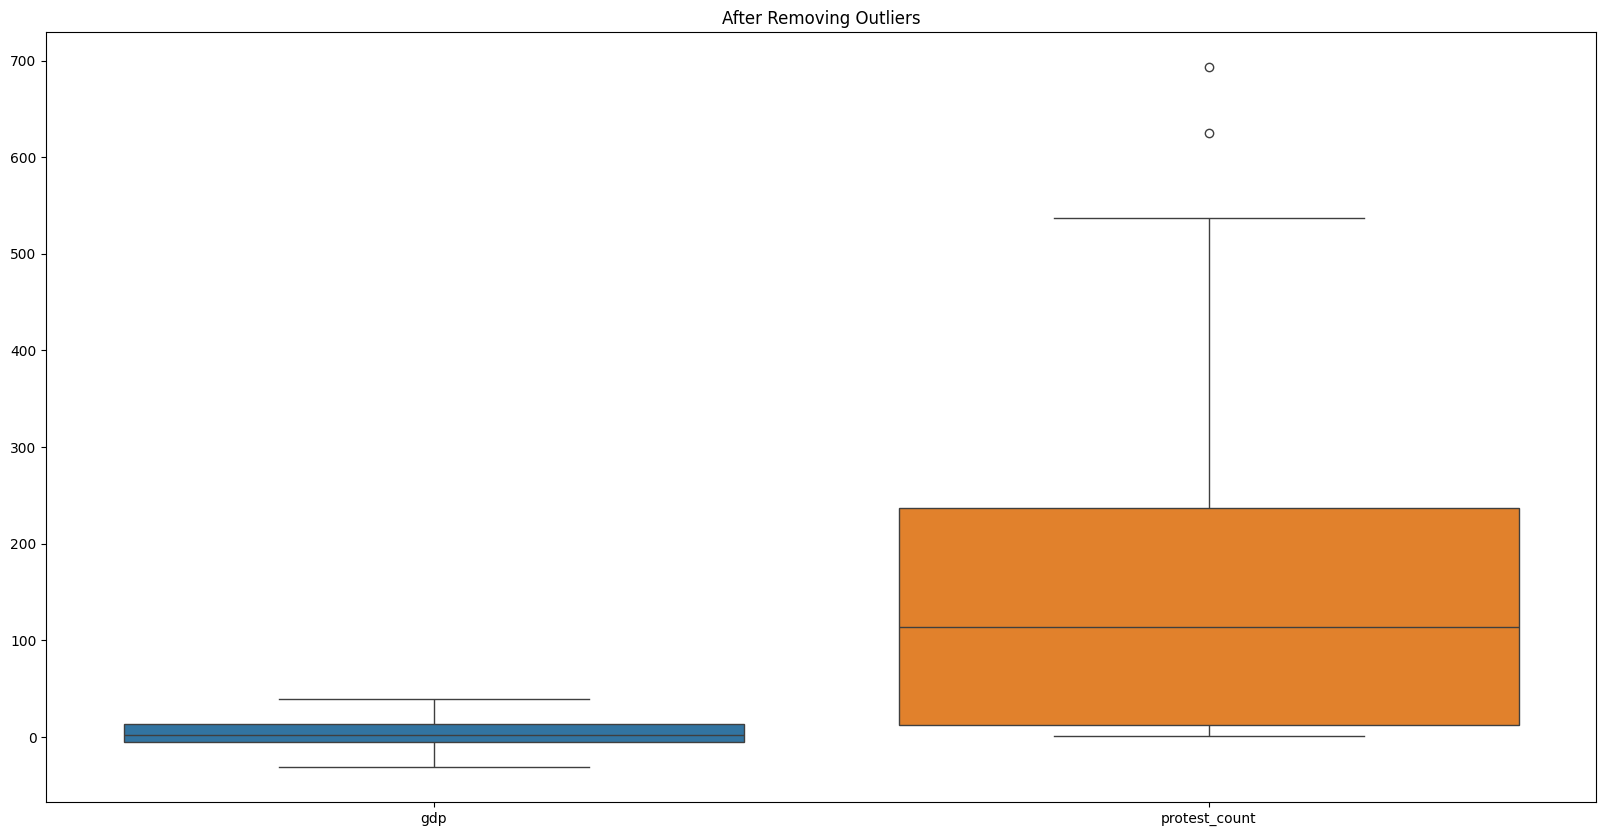

,country,year,protest_count,gdp,log_protest_count,log_gdp
0,Algeria,2005,6,14.89,1.791759,2.765690
1,Algeria,2006,7,13.34,1.945910,2.663053
2,Algeria,2007,2,13.89,0.693147,2.700690
3,Algeria,2008,9,24.46,2.197225,3.237109
4,Algeria,2009,12,-18.15,2.484907,-2.952303


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before removing outliers
sns.boxplot(data=merged_df[['gdp', 'protest_count']])
plt.title("Before Removing Outliers")
plt.show()

# After removing outliers
sns.boxplot(data=filtered_df[['gdp', 'protest_count']])
plt.title("After Removing Outliers")
plt.show()
filtered_df.head()


In [ ]:
# Generate summary statistics for the cleaned dataset
summary_statistics = filtered_df.describe()

# Output the summary statistics
print("Summary Statistics After Removing Outliers:")
print(summary_statistics)


Summary Statistics After Removing Outliers:
              year  protest_count        gdp
count    51.000000      51.000000  51.000000
mean   2013.764706     168.568627   2.840588
std       4.692923     182.686754  15.335432
min    2005.000000       1.000000 -31.330000
25%    2010.000000      12.500000  -4.825000
50%    2015.000000     114.000000   1.740000
75%    2018.000000     236.500000  13.615000
max    2020.000000     693.000000  39.230000


In [ ]:
# Perform the Pearson correlation test
r, p_value = stats.pearsonr(gdp_per_capita_growth, protest_count) # Use gdp_per_capita_growth which is filtered_df['gdp']
print("Pearson Correlation Coefficient (r):", r)
print("p-value:", p_value)
print("t-statistic:", t_stat)
print("Critical t-value:", t_critical)


Pearson Correlation Coefficient (r): -0.1344658735111019
p-value: 0.3468310588476444
t-statistic: -0.3786963787332731
Critical t-value: 1.6720288884609527


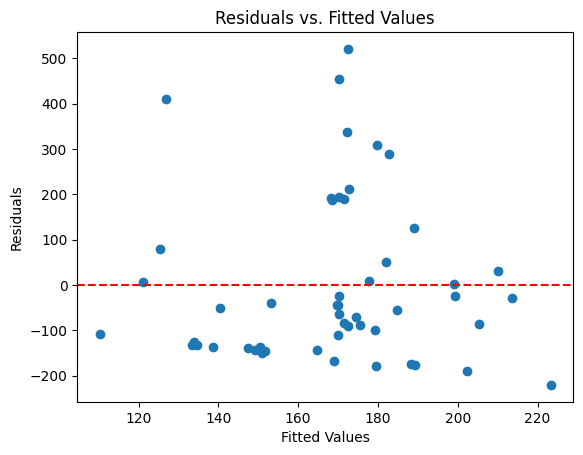

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # Import statsmodels

# ... (Your existing code to prepare data) ...

# Fit a linear regression model (example)
results = smf.ols('protest_count ~ gdp', data=filtered_df).fit()

# Get the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Create a scatter plot of residuals vs. fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


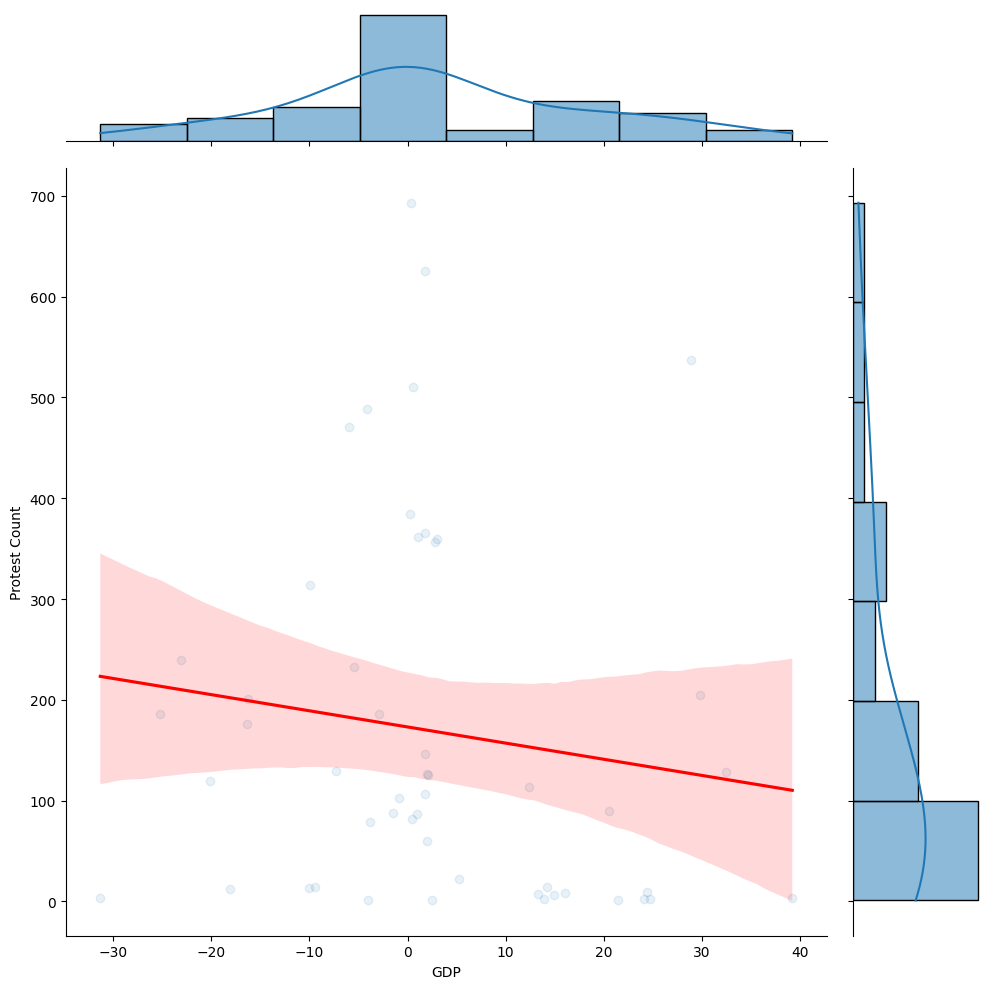

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the jointplot for GDP vs protest count
sns.jointplot(data=filtered_df,
              x='gdp',  # Set the x-axis to GDP
              y='protest_count',  # Set the y-axis to protest count
              kind="reg",  # Set the kind of plot to be a regression plot
              scatter_kws=dict(alpha=0.1),  # Set the transparency of the points to 10%
              line_kws=dict(color='red'),  # Set the color of the regression line to red
              height=10)  # Set the height of the plot to be 10 inches

# Add labels to the axes
plt.xlabel('GDP')  # Add a label to the x-axis
plt.ylabel('Protest Count')  # Add a label to the y-axis

# Show the plot
plt.show()


In [ ]:
# Import the necessary module
import statsmodels.api as sm

# Define independent and dependent variables
X = filtered_df['gdp']  # Independent variable (GDP per capita)
Y = filtered_df['protest_count']  # Dependent variable (Protest count)

# Add a constant to the independent variable for the intercept term in the regression model
X = sm.add_constant(X)  # Now 'sm' is defined and can be used

In [ ]:
# Fit the regression model
model = sm.OLS(Y, X)
results = model.fit()

# Display the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          protest_count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9023
Date:                Fri, 24 Jan 2025   Prob (F-statistic):              0.347
Time:                        22:37:23   Log-Likelihood:                -336.99
No. Observations:                  51   AIC:                             678.0
Df Residuals:                      49   BIC:                             681.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.1188     26.051      6.646      0.0

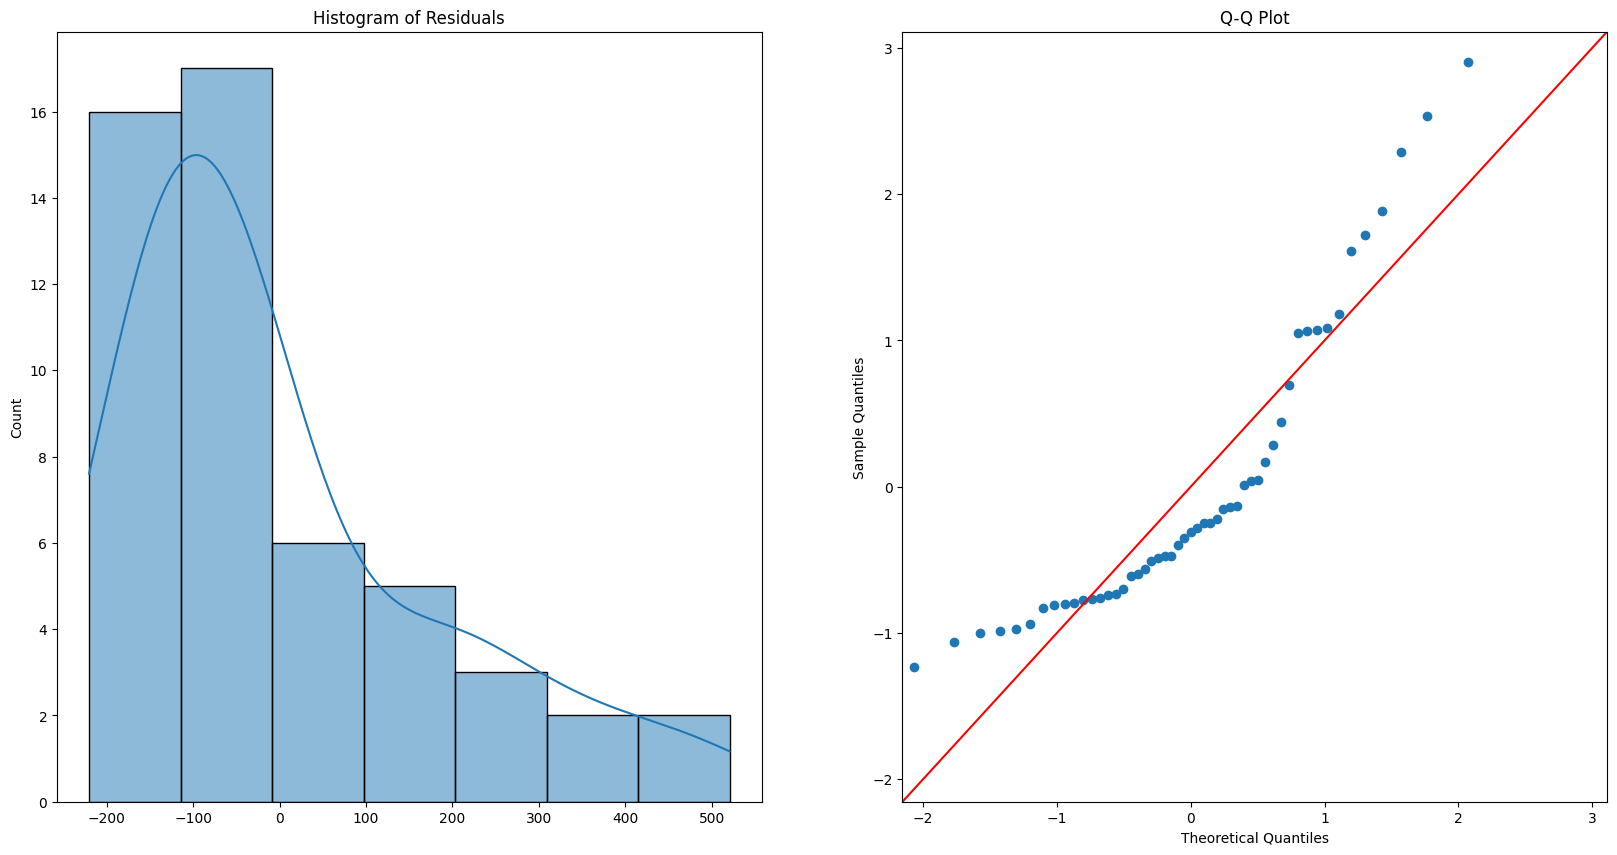

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Fit a linear regression model: protest_count ~ gdp
model = smf.ols('protest_count ~ gdp', data=filtered_df).fit()

# Get residuals
residuals = model.resid

# Make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

# Create a 1x2 subplot
f, axes = plt.subplots(1, 2)

# Plot the histogram of residuals with KDE
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')  # Add title

# Plot the Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot')  # Add title

# Show the plots
plt.show()


<ipython-input-34-53efde57549d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_protest_count'] = np.log(filtered_df['protest_count'])


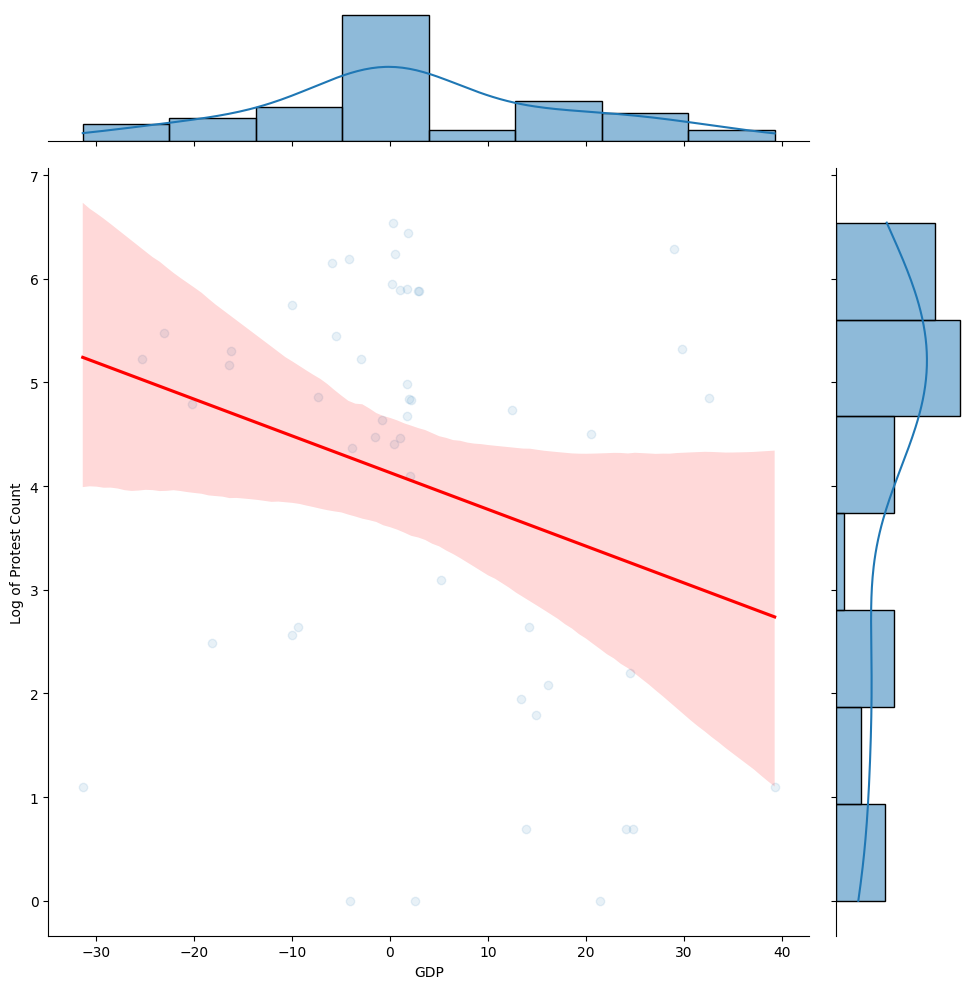

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Log-transform the 'protest_count' column to normalize it
filtered_df['log_protest_count'] = np.log(filtered_df['protest_count'])

# Step 2: Create a jointplot to visualize the relationship
sns.jointplot(
    data=filtered_df,
    x='gdp',  # X-axis: GDP
    y='log_protest_count',  # Y-axis: Log-transformed protest count
    kind="reg",  # Regression plot
    scatter_kws=dict(alpha=0.1),  # Transparency for scatter points
    line_kws=dict(color='red'),  # Regression line color
    height=10  # Plot height
)

# Step 3: Add axis labels
plt.xlabel('GDP')
plt.ylabel('Log of Protest Count')

plt.show()


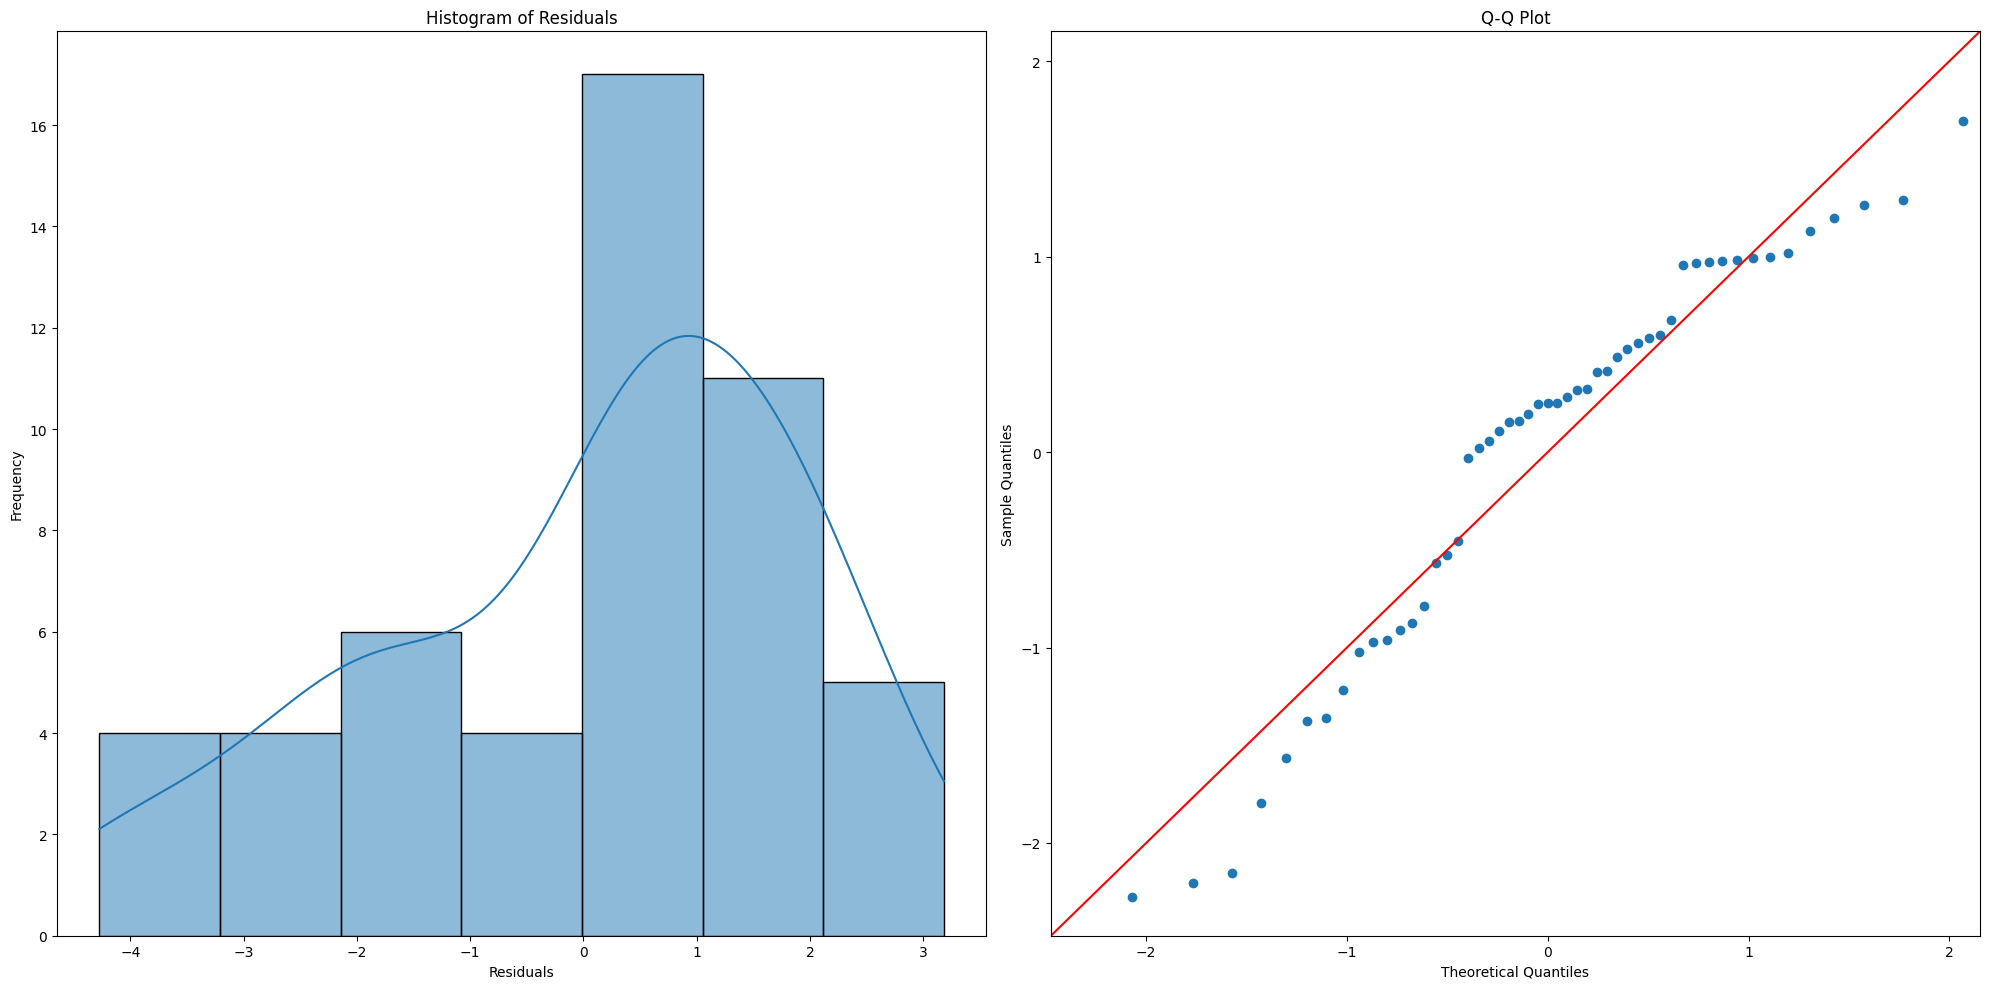

In [ ]:
# Run the regression with log-transformed protest count
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the regression model
model = ols('log_protest_count ~ gdp', data=filtered_df).fit()

# Get residuals from the model
residuals = model.resid

# Plot the Q-Q plot and histogram of residuals
plt.rcParams["figure.figsize"] = [20, 10]  # Make the figure wider

f, axes = plt.subplots(1, 2)

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


<ipython-input-37-90803c3c3b4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_gdp'] = np.sign(filtered_df['gdp']) * np.log(np.abs(filtered_df['gdp']) + 1)


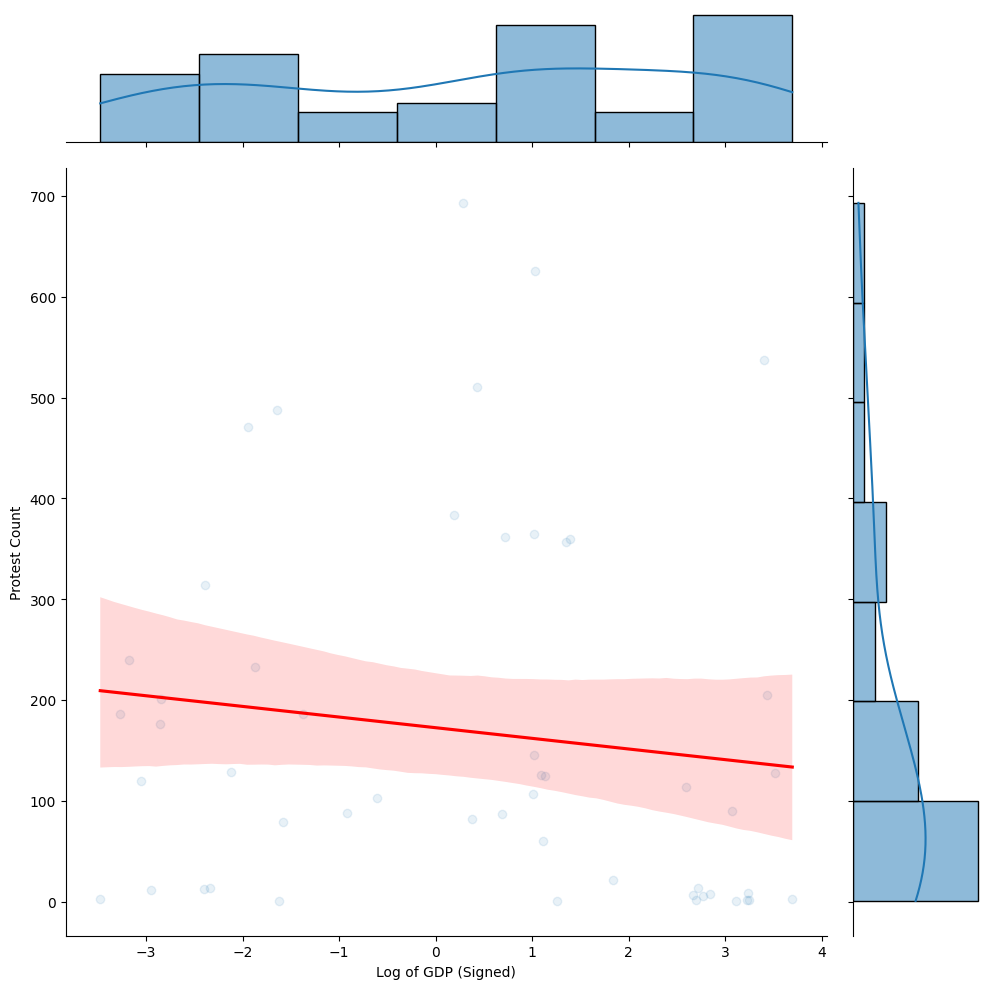

In [ ]:
# Modified log transformation to handle negative and zero GDP
filtered_df['log_gdp'] = np.sign(filtered_df['gdp']) * np.log(np.abs(filtered_df['gdp']) + 1)

# Create a jointplot with modified log-transformed GDP
sns.jointplot(
    data=filtered_df,
    x='log_gdp',  # Log-transformed GDP with sign
    y='protest_count',  # Protest count remains untransformed
    kind="reg",  # Regression plot
    scatter_kws=dict(alpha=0.1),  # Transparency for scatter points
    line_kws=dict(color='red'),  # Regression line color
    height=10  # Plot height
)

plt.xlabel('Log of GDP (Signed)')
plt.ylabel('Protest Count')
plt.show()


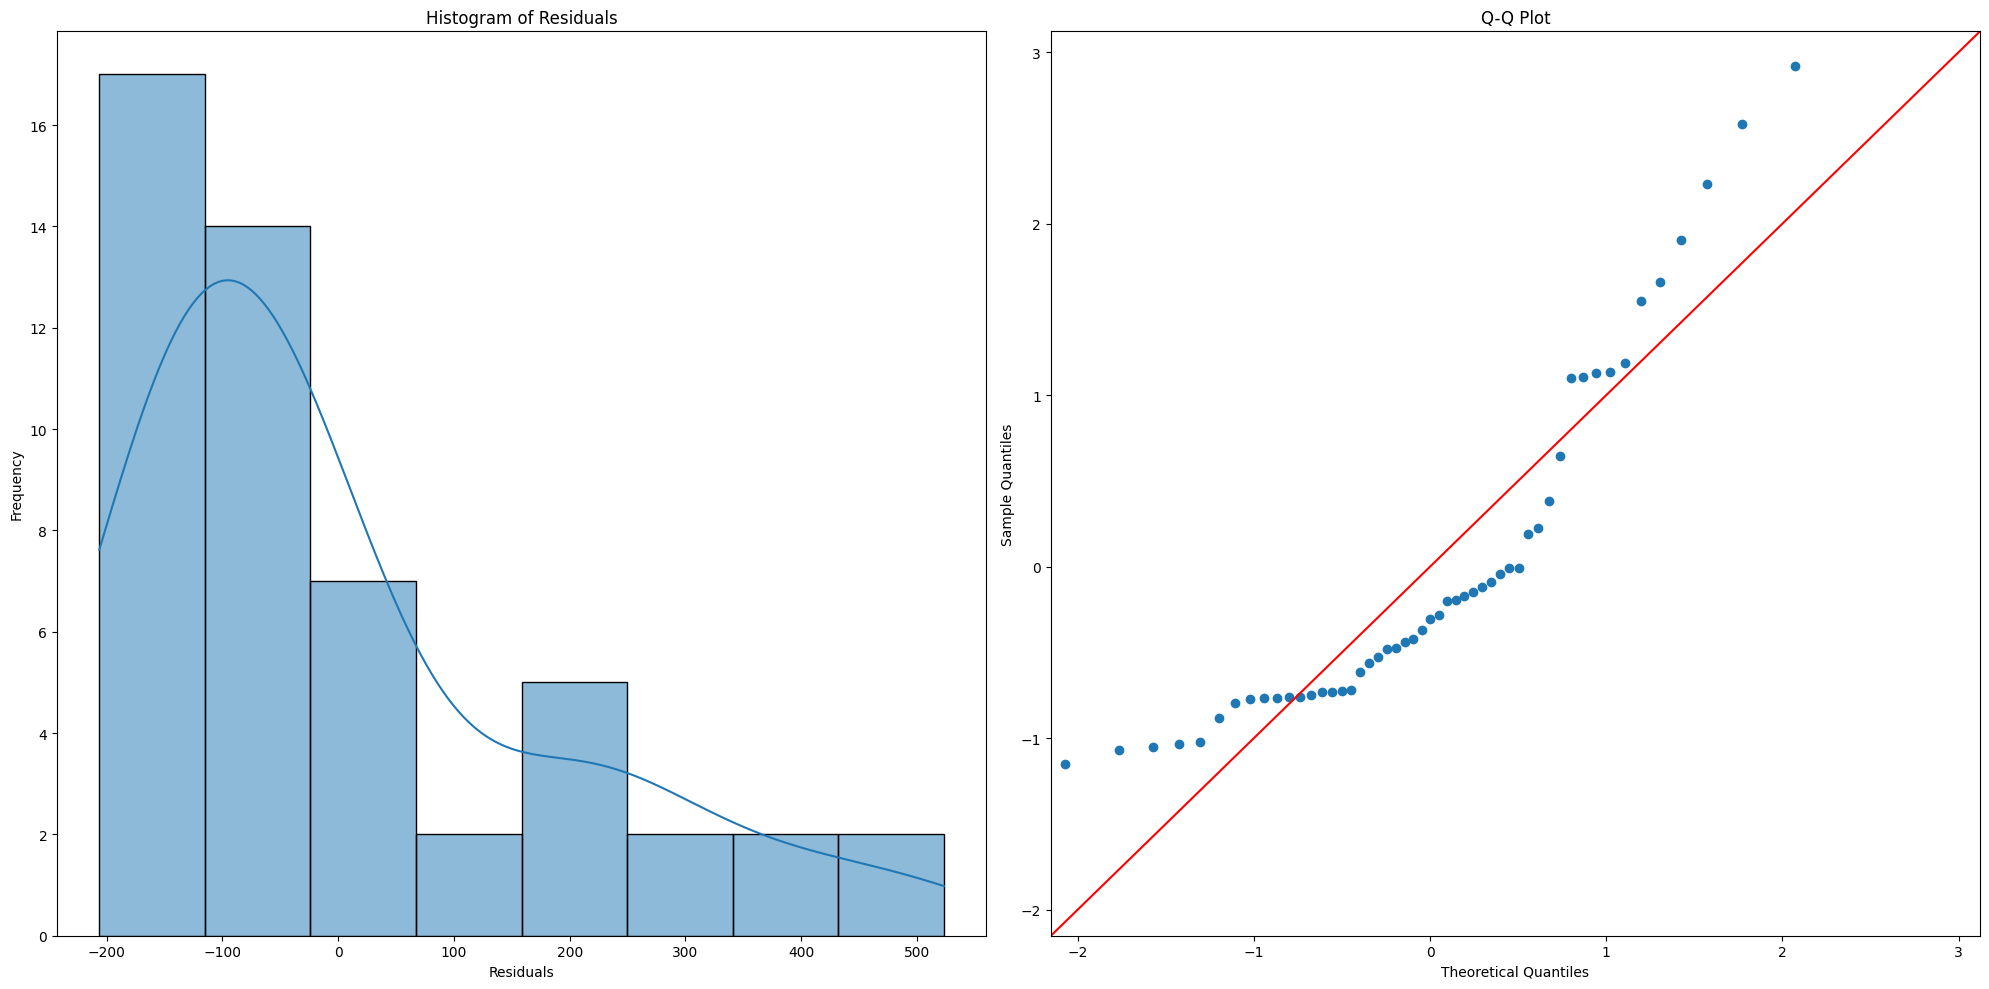

In [ ]:
# Run the regression with log-transformed GDP and original protest count
model = ols('protest_count ~ log_gdp', data=filtered_df).fit()

# Get residuals from the model
residuals = model.resid

# Plot the Q-Q plot and histogram of residuals
plt.rcParams["figure.figsize"] = [20, 10]  # Make the figure wider

f, axes = plt.subplots(1, 2)

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# Assuming filtered_df is already available in your environment
# Fit the regression model on original variables (unlogged model)
model = ols('protest_count ~ gdp', data=filtered_df).fit()

# Fit the regression model on log-transformed variables (logged model)
log_model = ols('protest_count ~ log_gdp', data=filtered_df).fit()

# Create the summary comparison table for both models
table = summary_col(
    [model, log_model],  # Models to compare
    stars=True,  # Add stars for significance levels
    float_format='%0.3f',  # Set decimal places to 3
    model_names=['Unlogged', 'Logged'],  # Model names
    info_dict={"N": lambda x: f"{int(x.nobs)}"}  # Add number of observations
)

# Print the comparison table
print(table)



                Unlogged    Logged  
------------------------------------
Intercept      173.119*** 172.643***
               (26.051)   (25.984)  
gdp            -1.602               
               (1.686)              
log_gdp                   -10.558   
                          (11.317)  
R-squared      0.018      0.017     
R-squared Adj. -0.002     -0.003    
N              51         51        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
